In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


## Data Cleaning ...!

In [5]:
for feat in df.columns:
    print(df[feat].value_counts())
    print('\n')
    print(30*'-')

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64


------------------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Nov               1
14-Jul               1
17-Jan               1
15-Dec               1
16-Jul               1
Name: availability, Length: 81, dtype: int64


------------------------------
Whitefield                            540
Sarjapur  Road                        399
Electronic City                       302
Kanakpura Road                        273
Thanisandra                           234
                                     ... 
Hosahalli                               1
Goraguntepalya                          1
Basvasamithi Layout Vidyaranyapura      1
Off Bannergatta road                    1
P Krishnappa Layout                     1
Name: location, Length: 1305

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.drop(['availability','society'],axis=1,inplace=True)

In [8]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13319 non-null  object 
 2   size        13304 non-null  object 
 3   total_sqft  13320 non-null  object 
 4   bath        13247 non-null  float64
 5   balcony     12711 non-null  float64
 6   price       13320 non-null  float64
dtypes: float64(3), object(4)
memory usage: 728.6+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [11]:
df['location'].value_counts()

Whitefield                            540
Sarjapur  Road                        399
Electronic City                       302
Kanakpura Road                        273
Thanisandra                           234
                                     ... 
Hosahalli                               1
Goraguntepalya                          1
Basvasamithi Layout Vidyaranyapura      1
Off Bannergatta road                    1
P Krishnappa Layout                     1
Name: location, Length: 1305, dtype: int64

In [12]:
df['location'] = df['location'].fillna('Sarjapur  Road')

In [13]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
11 BHK           2
10 BHK           2
16 BHK           1
18 Bedroom       1
19 BHK           1
27 BHK           1
14 BHK           1
13 BHK           1
43 Bedroom       1
12 Bedroom       1
Name: size, dtype: int64

In [14]:
df['size'] = df['size'].fillna('2 BHK')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13320 non-null  object 
 2   size        13320 non-null  object 
 3   total_sqft  13320 non-null  object 
 4   bath        13247 non-null  float64
 5   balcony     12711 non-null  float64
 6   price       13320 non-null  float64
dtypes: float64(3), object(4)
memory usage: 728.6+ KB


In [16]:
df['bath'] = df['bath'].fillna(df['bath'].median())

In [17]:
df['balcony'] = df['balcony'].fillna(df['balcony'].median())

In [18]:
df['BHK'] = df['size'].str.split().str.get(0).astype('int64')

In [19]:
df.drop('size',axis=1,inplace=True)

In [20]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [21]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
def convertRange(x):
    
    ans = x.split('-')
    if len(ans) == 2:
        res = (float(ans[0]) + float(ans[1]))/2
        return float(res)
    try:
        return float(x)
    except:
        return None

In [23]:
df['total_sqft'] = df['total_sqft'].apply(convertRange)

In [24]:
df['total_sqft'].dtype

dtype('float64')

In [25]:
df['total_sqft'].isnull().sum()

46

In [26]:
df['total_sqft'].fillna(df['total_sqft'].median(),inplace=True)

In [27]:
df

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,Richards Town,3600.0,5.0,2.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [28]:
df['location'].value_counts()

Whitefield                            540
Sarjapur  Road                        400
Electronic City                       302
Kanakpura Road                        273
Thanisandra                           234
                                     ... 
Hosahalli                               1
Goraguntepalya                          1
Basvasamithi Layout Vidyaranyapura      1
Off Bannergatta road                    1
P Krishnappa Layout                     1
Name: location, Length: 1305, dtype: int64

In [29]:
df['location'] = df['location'].apply(lambda x : x.strip())
location_count = df['location'].value_counts()

In [30]:
location_count

Whitefield                         541
Sarjapur  Road                     400
Electronic City                    304
Kanakpura Road                     273
Thanisandra                        237
                                  ... 
AECS LAYOUT A-BLOCK Singasandra      1
Kanakadasa Layout                    1
Kanakapur main road                  1
3rd Block HBR Layout                 1
P Krishnappa Layout                  1
Name: location, Length: 1294, dtype: int64

In [31]:
location_count_less_10 = location_count[location_count<=10]

In [32]:
location_count_less_10

Gunjur Palya                       10
Nagadevanahalli                    10
Dairy Circle                       10
1st Block Koramangala              10
Kalkere                            10
                                   ..
AECS LAYOUT A-BLOCK Singasandra     1
Kanakadasa Layout                   1
Kanakapur main road                 1
3rd Block HBR Layout                1
P Krishnappa Layout                 1
Name: location, Length: 1053, dtype: int64

In [33]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [34]:
df['location'].value_counts()

other                        2885
Whitefield                    541
Sarjapur  Road                400
Electronic City               304
Kanakpura Road                273
                             ... 
2nd Phase Judicial Layout      11
Tindlu                         11
Thyagaraja Nagar               11
Nehru Nagar                    11
LB Shastri Nagar               11
Name: location, Length: 242, dtype: int64

In [35]:
df

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,other,3600.0,5.0,2.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


# Removing Outliers 

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13320.0,1558.647202,1236.376834,1.0,1100.0,1276.0,1678.0,52272.0
bath,13320.0,2.688814,1.338754,1.0,2.0,2.0,3.0,40.0
balcony,13320.0,1.603378,0.803067,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0
BHK,13320.0,2.802778,1.294496,1.0,2.0,3.0,3.0,43.0


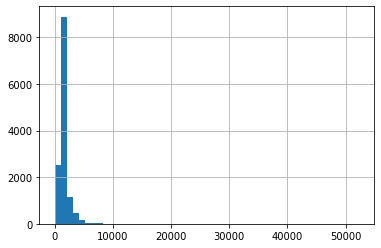

In [37]:
df['total_sqft'].hist(bins=50)

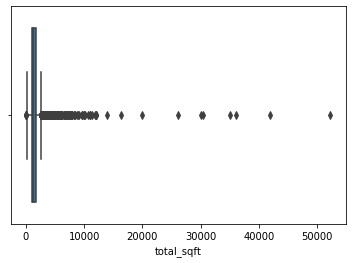

In [38]:
sns.boxplot(df['total_sqft'])

In [39]:
### lets compute the interquantile range to calculate the boundaries

IQR = df['total_sqft'].quantile(0.75) - df['total_sqft'].quantile(0.25)

IQR

578.0

In [40]:

lower_bridge = df['total_sqft'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['total_sqft'].quantile(0.75) + (IQR*1.5)

print(upper_bridge)
print(lower_bridge)

2545.0
233.0


In [41]:

### Extreme Outlier

lower_bridge = df['total_sqft'].quantile(0.25) - (IQR*3)
upper_bridge = df['total_sqft'].quantile(0.75) + (IQR*3)

print(upper_bridge)
print(lower_bridge)

3412.0
-634.0


In [42]:
df.loc[df['total_sqft']>=3420.0,'total_sqft'] = 3420.0

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13320.0,1485.129545,664.637830,1.0,1100.0,1276.0,1678.0,3420.0
bath,13320.0,2.688814,1.338754,1.0,2.0,2.0,3.0,40.0
balcony,13320.0,1.603378,0.803067,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0
BHK,13320.0,2.802778,1.294496,1.0,2.0,3.0,3.0,43.0


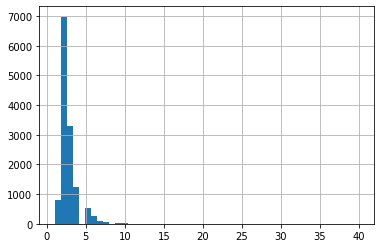

In [44]:
df['bath'].hist(bins=50)

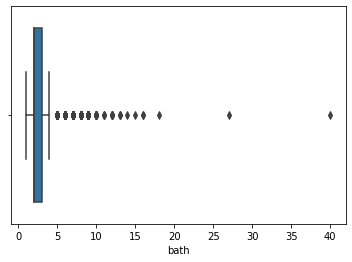

In [45]:
sns.boxplot(df['bath'])

In [46]:
# df[df['bath']>5]


IQR = df['bath'].quantile(0.75) - df['bath'].quantile(0.25)


lower_bridge = df['bath'].quantile(0.25) - (IQR*3)
upper_bridge = df['bath'].quantile(0.75) + (IQR*3)

print(upper_bridge)
print(lower_bridge)

6.0
-1.0


In [47]:
df.loc[df['bath']>=6,'bath'] = 6

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13320.0,1485.129545,664.637830,1.0,1100.0,1276.0,1678.0,3420.0
bath,13320.0,2.644294,1.109808,1.0,2.0,2.0,3.0,6.0
balcony,13320.0,1.603378,0.803067,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0
BHK,13320.0,2.802778,1.294496,1.0,2.0,3.0,3.0,43.0


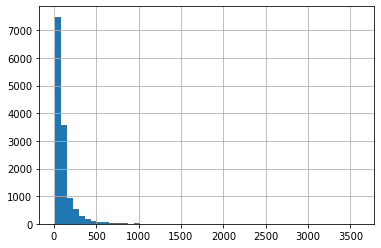

In [49]:
df['price'].hist(bins=50)

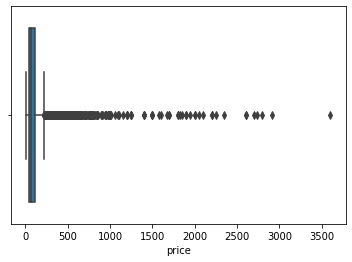

In [50]:
sns.boxplot(df['price'])

In [51]:
IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)


lower_bridge = df['price'].quantile(0.25) - (IQR*3)
upper_bridge = df['price'].quantile(0.75) + (IQR*3)

print(upper_bridge)
print(lower_bridge)

330.0
-160.0


In [52]:
df.loc[df['price']>=330.0,'price'] = 330.0

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13320.0,1485.129545,664.637830,1.0,1100.0,1276.0,1678.0,3420.0
bath,13320.0,2.644294,1.109808,1.0,2.0,2.0,3.0,6.0
balcony,13320.0,1.603378,0.803067,0.0,1.0,2.0,2.0,3.0
price,13320.0,100.443554,77.741452,8.0,50.0,72.0,120.0,330.0
BHK,13320.0,2.802778,1.294496,1.0,2.0,3.0,3.0,43.0


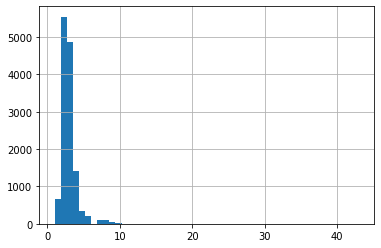

In [54]:
df['BHK'].hist(bins=50)

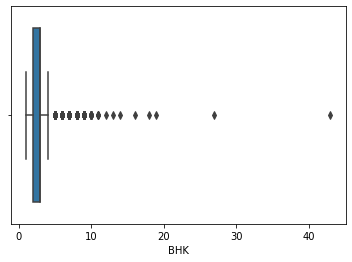

In [55]:
sns.boxplot(df['BHK'])

In [56]:
IQR = df['BHK'].quantile(0.75) - df['BHK'].quantile(0.25)


lower_bridge = df['BHK'].quantile(0.25) - (IQR*3)
upper_bridge = df['BHK'].quantile(0.75) + (IQR*3)

print(upper_bridge)
print(lower_bridge)

6.0
-1.0


In [57]:
df.loc[df['BHK']>=6,'BHK'] = 6

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13320.0,1485.129545,664.637830,1.0,1100.0,1276.0,1678.0,3420.0
bath,13320.0,2.644294,1.109808,1.0,2.0,2.0,3.0,6.0
balcony,13320.0,1.603378,0.803067,0.0,1.0,2.0,2.0,3.0
price,13320.0,100.443554,77.741452,8.0,50.0,72.0,120.0,330.0
BHK,13320.0,2.755480,1.047795,1.0,2.0,3.0,3.0,6.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13320 non-null  object 
 2   total_sqft  13320 non-null  float64
 3   bath        13320 non-null  float64
 4   balcony     13320 non-null  float64
 5   price       13320 non-null  float64
 6   BHK         13320 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 728.6+ KB


## Final Clean Data

In [60]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


In [61]:
df.reset_index = True

In [62]:
df.to_csv('Clean_Data.csv')

In [63]:
df = pd.read_csv('Clean_data.csv',)
df = df.drop('Unnamed: 0',axis=1)
df.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


# Training Model...

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [65]:
X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(X[['area_type','location']])

OneHotEncoder()

In [67]:
ohe.categories_

[array(['Built-up  Area', 'Carpet  Area', 'Plot  Area',
        'Super built-up  Area'], dtype=object),
 array(['1st Block Jayanagar', '1st Phase JP Nagar',
        '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
        '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
        '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
        'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
        'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
        'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
        'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
        'Badavala Nagar', 'Balagere', 'Banashankari',
        'Banashankari Stage II', 'Banashankari Stage III',
        'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
        'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
        'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
        'Begur Road', 'Bellandur', 'Bens

In [68]:
col_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['area_type','location']),
                                   remainder='passthrough')

In [69]:
lr = LinearRegression(normalize=True)

In [70]:
scaler = StandardScaler(with_mean=False)

In [71]:
pipe = make_pipeline(col_trans,scaler ,lr)

In [72]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Built-up  Area', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'], dtype=object),
                                                                            array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)]),
                                                  ['area_type', 'location'])])),
     

In [73]:
lr_predict = pipe.predict(X_test)

In [74]:
r2_score(y_test,lr_predict)

0.770087020620665

# Saving Model

In [75]:
import pickle

pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

# Checking the model...

In [76]:
# 1
pipe.predict(pd.DataFrame([['Plot  Area','Chikka Tirupathi',2600.0,5.0,3.0,4]],columns=['area_type', 'location', 'total_sqft', 'bath', 'balcony', 'BHK']))

array([129.95727538])

In [77]:
y[1]

120.0

In [79]:
# 2
pipe.predict(pd.DataFrame([['Built-up  Area','Whitefield',3420.0,4.0,0.0,5]],columns=['area_type', 'location', 'total_sqft', 'bath', 'balcony', 'BHK']))

array([241.51677022])

In [80]:
y[13315]

231.0

# Thankyou !!!